# EXPLORACIÓN DE LOS DATOS


In [1]:
# Importamos las librerías necesarias para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leémos nuestro dataset
df = pd.read_csv('salud.csv');df

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


In [3]:
# Mostramos el tamaño de nuestro data set
df.shape 

(1977, 39)

In [4]:
# Mostramos informacion de nuestro data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1977 non-null   object
 2   3. University                                                                                               

In [5]:
# Filtramos columnas categóricas (tipo object)
categorical_columns = df.select_dtypes(include=['object'])
print("Columnas categóricas:")
print(categorical_columns.columns)

# Filtramos columnas numéricas (tipo int64 o float64)
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print("\nColumnas numéricas:")
print(numerical_columns.columns)


Columnas categóricas:
Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       'Anxiety Label', 'Stress Label', 'Depression Label'],
      dtype='object')

Columnas numéricas:
Index(['1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if someth

In [6]:
# Renombramos las columnas para una mejor lectura 
df.rename(columns={
    '1. Age':'Age', '2. Gender':'Gender', '3. University':'University', '4. Department':'Department',
    '5. Academic Year': 'Year',
    '6. Current CGPA': 'CGPA',
    '7. Did you receive a waiver or scholarship at your university?': 'Beca'
}, inplace=True)

# Verificamos  los cambios
print(df.columns)


Index(['Age', 'Gender', 'University', 'Department', 'Year', 'CGPA', 'Beca',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ',
       '2. In a semester, how often you felt as if

Debido a que son muchas columnas que estan relacionadas al mismo tema, decidí usar las que generalizan las preguntas

In [7]:
# Lista de las columnas originales que deseas conservar (con los números incluidos)
columnsOk = [
    'Age', 'Gender', 'University', 'Department', 
    'Year', 'CGPA', 'Beca',
    'Anxiety Label', 'Anxiety Value', 
    'Stress Label', 'Stress Value',
    'Depression Label', 'Depression Value'
]

# Filtrar el DataFrame para quedarnos solo con las columnas seleccionadas
dfOk = df[columnsOk]

# Verificar el DataFrame filtrado
print(dfOk.head())

     Age  Gender                                University  \
0  18-22  Female  Independent University, Bangladesh (IUB)   
1  18-22    Male  Independent University, Bangladesh (IUB)   
2  18-22    Male  Independent University, Bangladesh (IUB)   
3  18-22    Male  Independent University, Bangladesh (IUB)   
4  18-22    Male  Independent University, Bangladesh (IUB)   

                                     Department                       Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Fourth Year or Equivalent   
1  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
2  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
3  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
4  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   

          CGPA Beca     Anxiety Label  Anxiety Value     Stress Label  \
0  2.50 - 2.99   No  Moderate Anxiety             10  Moderate Stress   
1  3.80 - 4.

# LIMPIEZA DEL DATASET

In [8]:
# Imprimimos algunas filas del dataframe que ajustamos
dfOk.head(15)

,Age,Gender,University,Department,Year,CGPA,Beca,Anxiety Label,Anxiety Value,Stress Label,Stress Value,Depression Label,Depression Value
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,Moderate Anxiety,10,Moderate Stress,21,Moderate Depression,11
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,Mild Anxiety,9,Moderate Stress,18,Mild Depression,9
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,Moderate Anxiety,10,Moderate Stress,23,Moderately Severe Depression,16
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,Mild Anxiety,8,Moderate Stress,20,Mild Depression,9
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,Mild Anxiety,7,Moderate Stress,20,Mild Depression,9
5,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,Moderate Anxiety,14,Moderate Stress,22,Moderately Severe Depression,18
6,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,Yes,Minimal Anxiety,4,Low Stress,5,Minimal Depression,3
7,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,2.50 - 2.99,No,Severe Anxiety,16,Moderate Stress,22,Moderate Depression,14
8,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,Moderate Anxiety,14,Moderate Stress,20,Moderately Severe Depression,18
9,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,Yes,Moderate Anxiety,13,Moderate Stress,22,Moderately Severe Depression,19


In [9]:
# Seleccionamos la columna de Age y le hacemos un unique para hacer el filto de todos los diferentes datos que hay en las filas
dfOk['Age'].unique()

array(['18-22', '23-26', 'Below 18', '27-30', 'Above 30'], dtype=object)

In [10]:
# Convertimos los datos de la columna 'Age' a datos númericos para su posterior manejo
#Usamos el promedio de el rango  e edades 
# Creamos un diccionario de mapeo para convertir las categorías de edad en valores numéricos
age_mapping = {
    'Below 18': 17,
    '18-22': 20,
    '23-26': 24,
    '27-30': 28,
    'Above 30': 35
}

# Aplicamos el mapeo a la columna 'Age'
dfOk['Age'] = dfOk['Age'].map(age_mapping)

# Verificacomos los cambios
print(dfOk['Age'].unique())

[20 24 17 28 35]


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\328192851.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Age'] = dfOk['Age'].map(age_mapping)


In [11]:
# Verificamos que la edad este numerico
dfOk['Age'].dtype

dtype('int64')

In [12]:
# Revisamos la columna e 'Gender' y los valores unicos
dfOk['Gender'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

Como tenemos 3 categorías en el genero decidimos usar hacer Encoding manualmente, y asignar  un número único a cada categoría. Ya que es útil si las categorías tienen algún tipo de relación jerárquica.

In [13]:
# Si quieres asignar un valor específico a cada categoría
dfOk['Gender'] = dfOk['Gender'].map({'Female': 0, 'Male': 1, 'Prefer not to say': 2})


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\3065902043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Gender'] = dfOk['Gender'].map({'Female': 0, 'Male': 1, 'Prefer not to say': 2})


In [14]:
#Verifricamos que se haya transformado
dfOk['Gender'].unique()

array([0, 1, 2], dtype=int64)

In [15]:
# Checamos las distintas universidades
dfOk['University'].unique()

array(['Independent University, Bangladesh (IUB)', 'Daffodil University',
       'Bangladesh University of Engineering and Technology (BUET)',
       'BRAC University', 'Dhaka University (DU)',
       'North South University (NSU)',
       'American International University Bangladesh (AIUB)',
       'Dhaka University of Engineering and Technology (DUET)',
       'Rajshahi University (RU)',
       'Islamic University of Technology (IUT)',
       'United International University (UIU)',
       'Patuakhali Science and Technology University',
       'Rajshahi University of Engineering and Technology (RUET)',
       'East West University (EWU)',
       'Bangladesh Agricultural University (BAU)'], dtype=object)

In [16]:
# Renombramos las universidades dentro de la columna 'University'para una mejor lectura 
dfOk['University'] = dfOk['University'].replace({
    'Independent University, Bangladesh (IUB)': 'IUB',
    'Daffodil University': 'Daffodil',
    'Bangladesh University of Engineering and Technology (BUET)': 'BUET',
    'BRAC University': 'BRAC',
    'Dhaka University (DU)': 'Dhaka',
    'North South University (NSU)': 'North_South',
    'American International University Bangladesh (AIUB)': 'AIUB',
    'Dhaka University of Engineering and Technology (DUET)': 'DUET',
    'Rajshahi University (RU)': 'Rajshahi',
    'Islamic University of Technology (IUT)': 'IUT',
    'United International University (UIU)': 'UIU',
    'Patuakhali Science and Technology University': 'Patuakhali',
    'Rajshahi University of Engineering and Technology (RUET)': 'RUET',
    'East West University (EWU)': 'EWU',
    'Bangladesh Agricultural University (BAU)': 'BAU'
})


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2351487948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['University'] = dfOk['University'].replace({


In [17]:
# Verificamos  los cambios
dfOk['University'].unique()

array(['IUB', 'Daffodil', 'BUET', 'BRAC', 'Dhaka', 'North_South', 'AIUB',
       'DUET', 'Rajshahi', 'IUT', 'UIU', 'Patuakhali', 'RUET', 'EWU',
       'BAU'], dtype=object)

In [18]:
# Revisamos la columna de 'Departament'
dfOk['Department'].unique()

array(['Engineering - CS / CSE / CSC / Similar to CS', 'Other',
       'Engineering - EEE/ ECE / Similar to EEE',
       'Environmental and Life Sciences',
       'Business and Entrepreneurship Studies',
       'Pharmacy and Public Health', 'Biological Sciences',
       'Engineering - Civil Engineering / Similar to CE',
       'Engineering - Mechanical Engineering / Similar to ME',
       'Engineering - Other', 'Law and Human Rights',
       'Liberal Arts and Social Sciences'], dtype=object)

In [19]:
# Mapeamos de departamentos a categorías más simples
department_mapping = {
    'Engineering - CS / CSE / CSC / Similar to CS': 'Engineering_CS',
    'Engineering - EEE/ ECE / Similar to EEE': 'Engineering_EEE',
    'Environmental and Life Sciences': 'Environmental_Sciences',
    'Business and Entrepreneurship Studies': 'Business',
    'Pharmacy and Public Health': 'Pharmacy',
    'Biological Sciences': 'Biological_Sciences',
    'Engineering - Civil Engineering / Similar to CE': 'Engineering_Civil',
    'Engineering - Mechanical Engineering / Similar to ME': 'Engineering_Mechanical',
    'Engineering - Other': 'Engineering_Other',
    'Law and Human Rights': 'Law',
    'Liberal Arts and Social Sciences': 'Liberal_Arts'
}

# Aplicamos el mapeo a la columna 'Department'
dfOk['Department'] = dfOk['Department'].replace(department_mapping)


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\1153087459.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Department'] = dfOk['Department'].replace(department_mapping)


In [20]:
# Verificamos los cambios
print(dfOk['Department'].unique())

['Engineering_CS' 'Other' 'Engineering_EEE' 'Environmental_Sciences'
 'Business' 'Pharmacy' 'Biological_Sciences' 'Engineering_Civil'
 'Engineering_Mechanical' 'Engineering_Other' 'Law' 'Liberal_Arts']


In [21]:
#Revisamos la columna de 'Year'
print(dfOk['Year'].unique())

['Fourth Year or Equivalent' 'First Year or Equivalent'
 'Third Year or Equivalent' 'Second Year or Equivalent' 'Other']


In [22]:
# Definir el mapeo de los años
year_map = {
    'First Year or Equivalent': 1,
    'Second Year or Equivalent': 2,
    'Third Year or Equivalent': 3,
    'Fourth Year or Equivalent': 4,
    'Other': 0  
}

# Usamos .loc para evitar el warning
dfOk.loc[:, 'Year'] = dfOk['Year'].replace(year_map)

# Convertirmos la columna 'Year' a numérico 
dfOk['Year'] = pd.to_numeric(dfOk['Year'], errors='coerce')

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\478004739.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Year'] = pd.to_numeric(dfOk['Year'], errors='coerce')


In [23]:
# Verificamos los cambios
print(dfOk['Year'].unique())

[4 1 3 2 0]


In [24]:
# Revisamos la columna de 'CGPA'
print(dfOk['CGPA'].unique())

['2.50 - 2.99' '3.80 - 4.00' '3.00 - 3.39' '3.40 - 3.79' 'Below 2.50'
 'Other']


In [25]:
# Creamos un diccionario de mapeo para la columna 'CGPA' y reemplazamos con promedio de cada rango
cgpa_map = {
    'Below 2.50': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
     
}

# Aplicamos el mapeo a la columna 'CGPA'
dfOk['CGPA'] = dfOk['CGPA'].replace(cgpa_map)

# Convertimos la columna 'CGPA' a tipo flotante
dfOk['CGPA'] = pd.to_numeric(dfOk['CGPA'], errors='coerce')


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\841681673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['CGPA'] = dfOk['CGPA'].replace(cgpa_map)
C:\Users\erika\AppData\Local\Temp\ipykernel_19844\841681673.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['CGPA'] = pd.to_numeric(dfOk['CGPA'], errors='coerce')


In [26]:
# Calculamos el promedio ignorando los valores 'NaN'
cgpa_mean = dfOk['CGPA'].mean()

# Reemplazamos "Other" con el promedio calculado
dfOk.loc[dfOk['CGPA'] == 0, 'CGPA'] = cgpa_mean  
dfOk['CGPA'].fillna(cgpa_mean, inplace=True)   

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\1765122663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['CGPA'].fillna(cgpa_mean, inplace=True)


In [27]:
# Redondeamos a 2 decimales y cambiamos a entero si el valor es un número entero
dfOk['CGPA'] = dfOk['CGPA'].apply(lambda x: round(x, 2) if x % 1 != 0 else int(x))

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\915870311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['CGPA'] = dfOk['CGPA'].apply(lambda x: round(x, 2) if x % 1 != 0 else int(x))


In [28]:
# Verificamos los cambios
print(dfOk['CGPA'].unique())

[2.75 3.9  3.2  3.6  2.25 3.28]


In [29]:
# Revisamos la columna de 'Beca'
print(dfOk['Beca'].unique())

['No' 'Yes']


In [30]:
# Reemplazamos 'No' por 0 y 'Yes' por 1 en la columna 'Beca'
dfOk['Beca'] = dfOk['Beca'].replace({'No': 0, 'Yes': 1})

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2204018194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Beca'] = dfOk['Beca'].replace({'No': 0, 'Yes': 1})


In [31]:
# Verificamos los cambios
print(dfOk['Beca'].unique())

[0 1]


In [32]:
# Revisamos la columna de 'Anxiety Label'
print(dfOk['Anxiety Label'].unique())

['Moderate Anxiety' 'Mild Anxiety' 'Minimal Anxiety' 'Severe Anxiety']


In [33]:
# Renombramos la columna 'Anxiety Label' a 'Anxiety_Label'
dfOk.rename(columns={'Anxiety Label': 'Anxiety_Label'}, inplace=True)

# Limpiamos la columna 'Anxiety_Label' para dejar solo los términos clave (Mild, Moderate, etc.)
dfOk['Anxiety_Label'] = dfOk['Anxiety_Label'].str.replace(' Anxiety', '', regex=False)


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2529246579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.rename(columns={'Anxiety Label': 'Anxiety_Label'}, inplace=True)
C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2529246579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Anxiety_Label'] = dfOk['Anxiety_Label'].str.replace(' Anxiety', '', regex=False)


In [34]:
# Verificamos los resultados
print(dfOk['Anxiety_Label'].unique())

['Moderate' 'Mild' 'Minimal' 'Severe']


In [35]:
# Renombramos la columna 'Anxiety Value' a 'Anxiety_Value'
dfOk.rename(columns={'Anxiety Value': 'Anxiety_Value'}, inplace=True)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\3811449722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.rename(columns={'Anxiety Value': 'Anxiety_Value'}, inplace=True)


In [36]:
# Revisamos la columna de 'Anxiety Value'
dfOk['Anxiety_Value'].unique()

array([10,  9,  8,  7, 14,  4, 16, 13, 18, 11, 19, 12,  3,  6,  0, 17, 15,
       21,  5, 20,  1,  2], dtype=int64)

In [37]:
# Renombramos la columna Stress_Label a 'Stress_Label'
dfOk.rename(columns={'Stress Label': 'Stress_Label'}, inplace=True)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\3557015604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.rename(columns={'Stress Label': 'Stress_Label'}, inplace=True)


In [38]:
# Revisamos la columna de 'Stress_Label'
dfOk['Stress_Label'].unique()

array(['Moderate Stress', 'Low Stress', 'High Perceived Stress'],
      dtype=object)

In [39]:
# Limpiamos la columna'Stress_Label' para dejar solo los términos clave ( Moderate, etc.)
dfOk['Stress_Label'] = dfOk['Stress_Label'].str.replace(' Stress', '', regex=False)
dfOk['Stress_Label'] = dfOk['Stress_Label'].str.replace('Perceived', '', regex=False)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2527632551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Stress_Label'] = dfOk['Stress_Label'].str.replace(' Stress', '', regex=False)
C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2527632551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Stress_Label'] = dfOk['Stress_Label'].str.replace('Perceived', '', regex=False)


In [40]:
dfOk['Stress_Label'].unique()

array(['Moderate', 'Low', 'High '], dtype=object)

In [41]:
# Renombramos la columna 'Stress Value' a 'Stress_Value'
dfOk.rename(columns={'Stress Value' : 'Stress_Value' }, inplace=True)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\1235333669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.rename(columns={'Stress Value' : 'Stress_Value' }, inplace=True)


In [42]:
# Revisamos la columna de 'Stress_Value'
dfOk['Stress_Value'].unique()

array([21, 18, 23, 20, 22,  5, 25, 15, 26, 24, 17, 19, 13, 30, 32, 31, 27,
       16, 12, 40, 14, 34, 36, 33, 38, 29, 28,  0, 35, 37, 10, 39,  8,  7,
       11,  9,  3,  6], dtype=int64)

In [43]:
dfOk

,Age,Gender,University,Department,Year,CGPA,Beca,Anxiety_Label,Anxiety_Value,Stress_Label,Stress_Value,Depression Label,Depression Value
0,20,0,IUB,Engineering_CS,4,2.75,0,Moderate,10,Moderate,21,Moderate Depression,11
1,20,1,IUB,Engineering_CS,1,3.90,0,Mild,9,Moderate,18,Mild Depression,9
2,20,1,IUB,Engineering_CS,1,3.20,0,Moderate,10,Moderate,23,Moderately Severe Depression,16
3,20,1,IUB,Engineering_CS,1,3.60,0,Mild,8,Moderate,20,Mild Depression,9
4,20,1,IUB,Engineering_CS,1,3.60,0,Mild,7,Moderate,20,Mild Depression,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,24,1,BAU,Biological_Sciences,4,3.60,0,Moderate,11,Moderate,24,Moderate Depression,13
1973,24,0,BAU,Other,4,3.60,0,Moderate,11,Moderate,20,Mild Depression,9
1974,24,0,BAU,Biological_Sciences,0,3.90,0,Mild,8,High,30,Severe Depression,22
1975,24,1,BAU,Other,4,3.20,0,Mild,9,Moderate,18,Moderate Depression,11


In [44]:
# Renombramos la columna 'Depression Label' a 'Depression_Label' 
dfOk.rename(columns={'Depression Label' :'Depression_Label' }, inplace=True)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\1046486134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.rename(columns={'Depression Label' :'Depression_Label' }, inplace=True)


In [45]:
# Revisamos la columna de 'Depression_Label' 
dfOk['Depression_Label' ].unique()

array(['Moderate Depression', 'Mild Depression',
       'Moderately Severe Depression', 'Minimal Depression',
       'Severe Depression', 'No Depression'], dtype=object)

In [46]:
# Limpiamos la columna'Depression_Label'  para dejar solo los términos clave ( Moderate,Mild etc.)
dfOk['Depression_Label'] = dfOk['Depression_Label'].str.replace(' Depression', '', regex=False)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\4198323907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Depression_Label'] = dfOk['Depression_Label'].str.replace(' Depression', '', regex=False)


In [47]:
# Reemplazamos 'Moderately Severe' por 'Moderately_Severe' en la columna 'Depression_Label'
dfOk['Depression_Label'] = dfOk['Depression_Label'].replace('Moderately Severe', 'Moderately_Severe')


C:\Users\erika\AppData\Local\Temp\ipykernel_19844\1339238913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk['Depression_Label'] = dfOk['Depression_Label'].replace('Moderately Severe', 'Moderately_Severe')


In [48]:
# Verificamos 
dfOk['Depression_Label' ].unique()

array(['Moderate', 'Mild', 'Moderately_Severe', 'Minimal', 'Severe', 'No'],
      dtype=object)

In [49]:
# Renombramos la columna 'Depression Value' a 'Depression_Value'
dfOk.rename(columns={'Depression Value' :'Depression_Value' }, inplace=True)

C:\Users\erika\AppData\Local\Temp\ipykernel_19844\2565353986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.rename(columns={'Depression Value' :'Depression_Value' }, inplace=True)


In [50]:
# Revisamos la columna de 'Depression Value'
dfOk['Depression_Value'].unique()

array([11,  9, 16, 18,  3, 14, 19, 23, 20,  6,  0,  4, 21, 12, 10,  7, 24,
       17,  2, 15, 13, 22,  1, 27,  8, 25, 26,  5], dtype=int64)

In [51]:
dfOk.head(10)

,Age,Gender,University,Department,Year,CGPA,Beca,Anxiety_Label,Anxiety_Value,Stress_Label,Stress_Value,Depression_Label,Depression_Value
0,20,0,IUB,Engineering_CS,4,2.75,0,Moderate,10,Moderate,21,Moderate,11
1,20,1,IUB,Engineering_CS,1,3.90,0,Mild,9,Moderate,18,Mild,9
2,20,1,IUB,Engineering_CS,1,3.20,0,Moderate,10,Moderate,23,Moderately_Severe,16
3,20,1,IUB,Engineering_CS,1,3.60,0,Mild,8,Moderate,20,Mild,9
4,20,1,IUB,Engineering_CS,1,3.60,0,Mild,7,Moderate,20,Mild,9
5,20,1,IUB,Engineering_CS,1,3.90,0,Moderate,14,Moderate,22,Moderately_Severe,18
6,20,1,IUB,Engineering_CS,1,3.90,1,Minimal,4,Low,5,Minimal,3
7,20,1,IUB,Engineering_CS,3,2.75,0,Severe,16,Moderate,22,Moderate,14
8,20,0,IUB,Engineering_CS,1,3.90,0,Moderate,14,Moderate,20,Moderately_Severe,18
9,20,0,IUB,Engineering_CS,1,3.90,1,Moderate,13,Moderate,22,Moderately_Severe,19


In [52]:
# Verificamos si hay valores NaN o null en cada columna
nan_values = dfOk.isnull().sum()
print(nan_values)


Age                 0
Gender              0
University          0
Department          0
Year                0
CGPA                0
Beca                0
Anxiety_Label       0
Anxiety_Value       0
Stress_Label        0
Stress_Value        0
Depression_Label    0
Depression_Value    0
dtype: int64


In [53]:
# Guardamos el DataFrame dfOk en un nuevo archivo CSV
#dfOk.to_csv('salud_limpia.csv',index=False)

In [54]:
# Leémos nuestro dataset
dfBien = pd.read_csv('salud_limpia.csv');dfBien

,Age,Gender,University,Department,Year,CGPA,Beca,Anxiety_Label,Anxiety_Value,Stress_Label,Stress_Value,Depression_Label,Depression_Value
0,20,0,IUB,Engineering_CS,4,2.75,0,Moderate,10,Moderate,21,Moderate,11
1,20,1,IUB,Engineering_CS,1,3.90,0,Mild,9,Moderate,18,Mild,9
2,20,1,IUB,Engineering_CS,1,3.20,0,Moderate,10,Moderate,23,Moderately_Severe,16
3,20,1,IUB,Engineering_CS,1,3.60,0,Mild,8,Moderate,20,Mild,9
4,20,1,IUB,Engineering_CS,1,3.60,0,Mild,7,Moderate,20,Mild,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,24,1,BAU,Biological_Sciences,4,3.60,0,Moderate,11,Moderate,24,Moderate,13
1973,24,0,BAU,Other,4,3.60,0,Moderate,11,Moderate,20,Mild,9
1974,24,0,BAU,Biological_Sciences,0,3.90,0,Mild,8,High,30,Severe,22
1975,24,1,BAU,Other,4,3.20,0,Mild,9,Moderate,18,Moderate,11


In [55]:
dfBien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1977 non-null   int64  
 1   Gender            1977 non-null   int64  
 2   University        1977 non-null   object 
 3   Department        1977 non-null   object 
 4   Year              1977 non-null   int64  
 5   CGPA              1977 non-null   float64
 6   Beca              1977 non-null   int64  
 7   Anxiety_Label     1977 non-null   object 
 8   Anxiety_Value     1977 non-null   int64  
 9   Stress_Label      1977 non-null   object 
 10  Stress_Value      1977 non-null   int64  
 11  Depression_Label  1977 non-null   object 
 12  Depression_Value  1977 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 200.9+ KB


In [56]:
dfBien.shape

(1977, 13)

# ANÁLISIS EXPLORATORIO

In [57]:
dfBien.describe()

,Age,Gender,Year,CGPA,Beca,Anxiety_Value,Stress_Value,Depression_Value
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,21.475468,0.704097,2.304502,3.279509,0.205362,12.290845,22.963075,14.374305
std,2.099626,0.467516,1.193074,0.415105,0.404068,5.496399,6.750405,6.659329
min,17.000000,0.000000,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1.000000,3.200000,0.000000,8.000000,19.000000,9.000000
50%,20.000000,1.000000,2.000000,3.200000,0.000000,13.000000,22.000000,14.000000
75%,24.000000,1.000000,3.000000,3.600000,0.000000,17.000000,27.000000,19.000000
max,35.000000,2.000000,4.000000,3.900000,1.000000,21.000000,40.000000,27.000000


# Clustering

### Estandarizamos

In [58]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos columnas relevantes para clustering
features = ['CGPA', 'Anxiety_Value', 'Stress_Value', 'Depression_Value','Age','Year','Beca']

# Normalizamos las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfBien[features])

# Verificamos la normalización 
print(df_scaled[:5])


[[-1.27592467 -0.41689552 -0.29088211 -0.50683155 -0.70290654  1.4214767
  -0.50836416]
 [ 1.49515642 -0.59887884 -0.73541233 -0.80723808 -0.70290654 -1.09367196
  -0.50836416]
 [-0.19158859 -0.41689552  0.00547137  0.24418477 -0.70290654 -1.09367196
  -0.50836416]
 [ 0.7722657  -0.78086215 -0.43905885 -0.80723808 -0.70290654 -1.09367196
  -0.50836416]
 [ 0.7722657  -0.96284547 -0.43905885 -0.80723808 -0.70290654 -1.09367196
  -0.50836416]]


### Agglomerative Clustering (Métodos de Enlace)

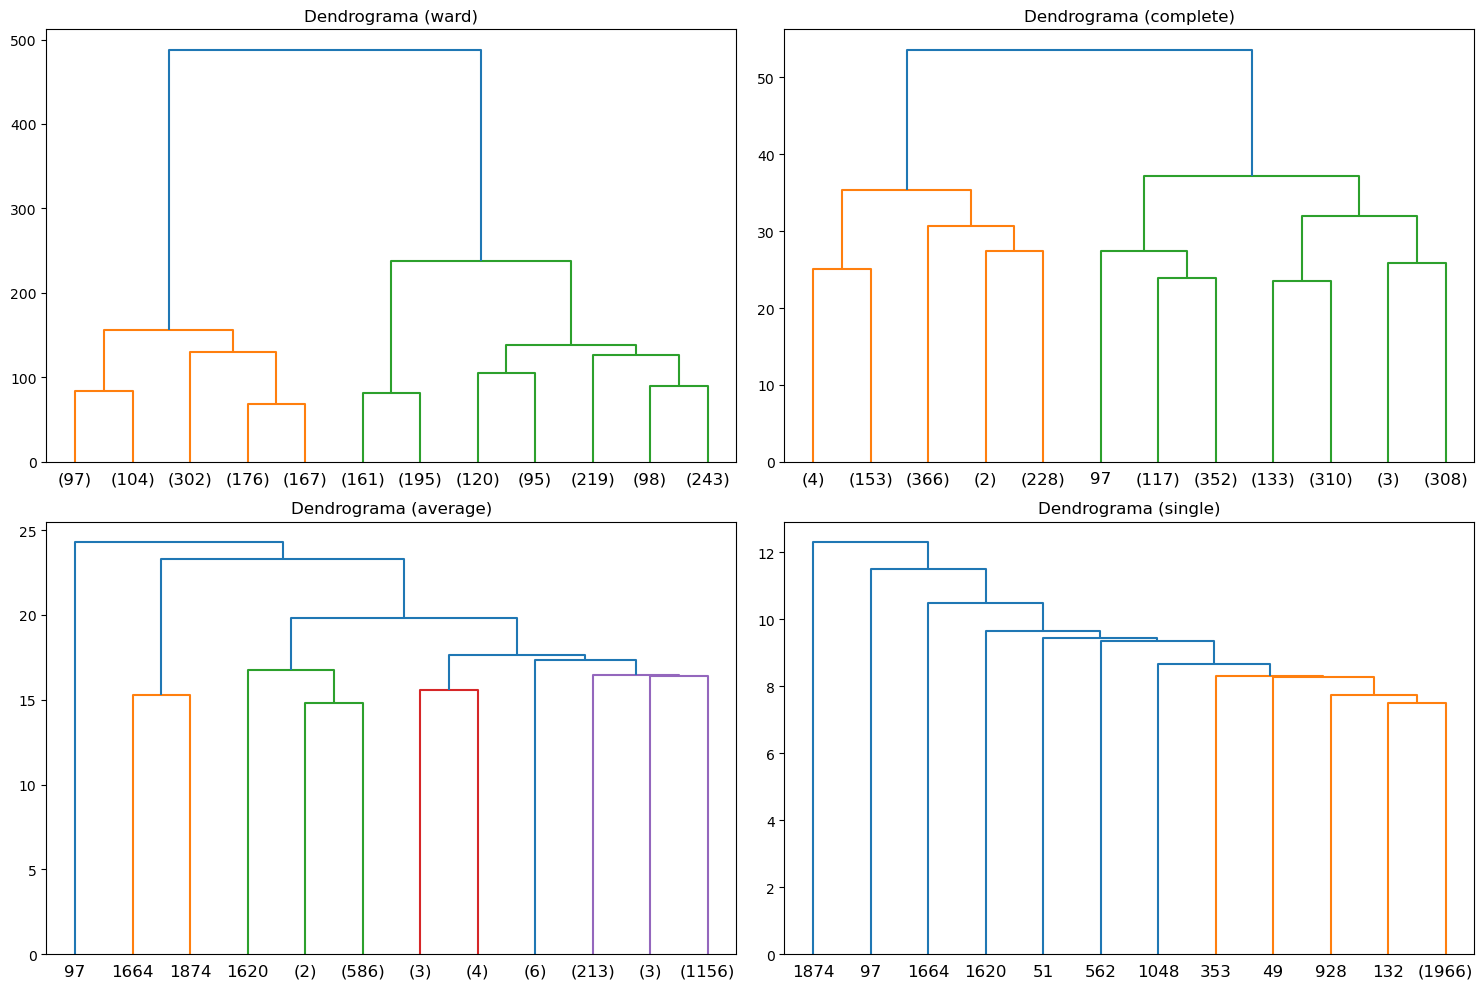

In [59]:
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Seleccionamos columnas relevantes para clustering
features = ['CGPA', 'Anxiety_Value', 'Stress_Value', 'Depression_Value','Age','Year','Beca']
categorical_columns = ['Gender', 'University', 'Department']

# Normalizamos las características numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfBien[features])

# Aplicamos LabelEncoder a las columnas categóricas
label_encoder = LabelEncoder()

for col in categorical_columns:
    dfBien[col] = label_encoder.fit_transform(dfBien[col])

# Unimos las columnas categóricas con las numéricas
df_combined = pd.concat([dfBien[features], dfBien[categorical_columns]], axis=1)

# Métodos de enlace para el clustering jerárquico
linkage_methods = ['ward', 'complete', 'average', 'single']

# Crear gráfico de dendrogramas
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)  # 2x2 grid para los dendrogramas
    linkage_matrix = sch.linkage(df_combined, method=method)  # df_combined tiene tanto datos numéricos como categóricos
    sch.dendrogram(linkage_matrix,truncate_mode='lastp', p=12)
    plt.title(f'Dendrograma ({method})')

plt.tight_layout()
plt.show()


### Con K-means

#### Método del Codo 

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

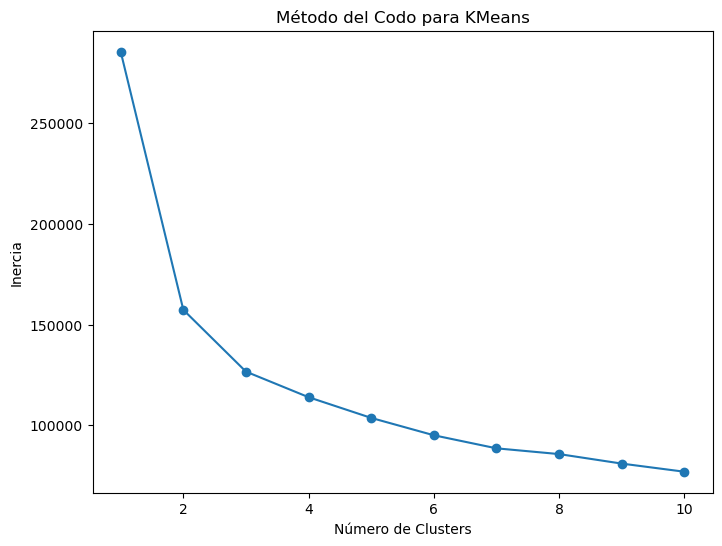

In [61]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_combined)
    inertia.append(kmeans.inertia_)

# Graficar el método del Codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para KMeans')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

### Silhouette_score

In [62]:
best_k = 3
best_score = -1

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_combined)
    score = silhouette_score(df_combined, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_k = k
print(f"Mejor número de clusters según Silhouette Score: {best_k} con un Silhouette Score de {best_score}")

Mejor número de clusters según Silhouette Score: 2 con un Silhouette Score de 0.35969203725785176


In [63]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
dfBien['KMeans_Cluster'] = kmeans.fit_predict(df_combined)

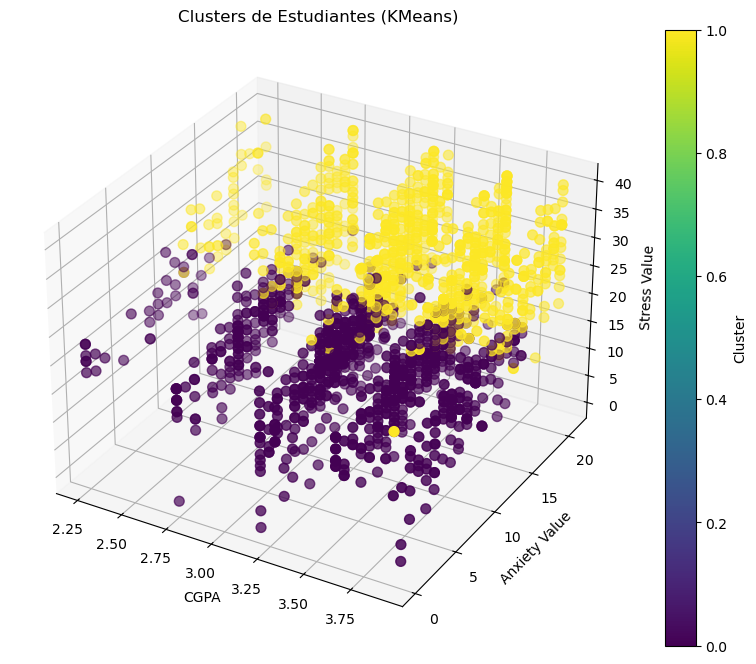

In [64]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfico 3D (usando CGPA, Anxiety_Value, y Stress_Value)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    dfBien['CGPA'], 
    dfBien['Anxiety_Value'], 
    dfBien['Stress_Value'], 
    c=dfBien['KMeans_Cluster'], 
    cmap='viridis', 
    s=50
)
ax.set_title('Clusters de Estudiantes (KMeans)')
ax.set_xlabel('CGPA')
ax.set_ylabel('Anxiety Value')
ax.set_zlabel('Stress Value')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


### DBSCAN

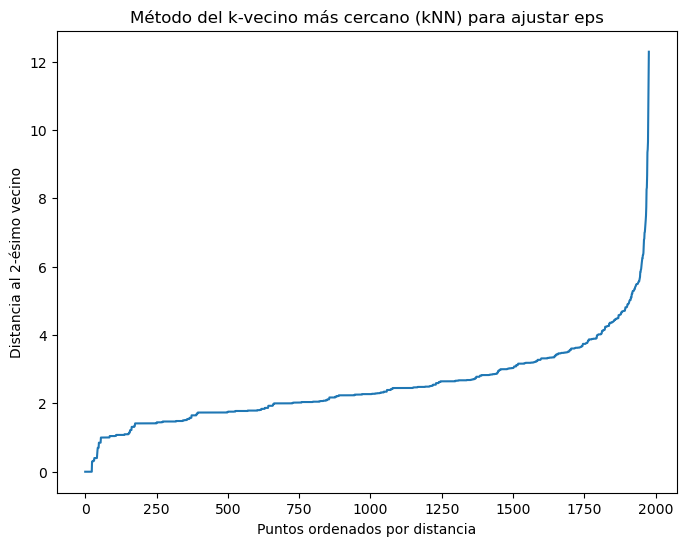

In [65]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Usamos k=2 porque KMeans determinó 2 clusters
k = 2

# Calcular las distancias al k-ésimo vecino más cercano
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined)
distances, indices = neighbors_fit.kneighbors(df_combined)

# Ordenar las distancias para encontrar el "codo"
distances = np.sort(distances[:, k-1], axis=0)

# Gráfico del k-vecino más cercano
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("Método del k-vecino más cercano (kNN) para ajustar eps")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel(f"Distancia al {k}-ésimo vecino")
plt.show()


In [66]:
from sklearn.cluster import DBSCAN

# Usamos eps=2.5 según el gráfico
eps_value = 2.5
min_samples_value = 5  # Prueba con diferentes valores (3, 5, 10)


dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dfBien['DBSCAN_Cluster'] = dbscan.fit_predict(df_combined)


In [67]:
eps_values = [2.0, 2.5, 3.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_combined)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_points = list(labels).count(-1)
        
        print(f"eps={eps}, min_samples={min_samples} -> Clusters: {num_clusters}, Puntos de ruido: {noise_points}")


eps=2.0, min_samples=3 -> Clusters: 66, Puntos de ruido: 1520
eps=2.0, min_samples=5 -> Clusters: 22, Puntos de ruido: 1766
eps=2.0, min_samples=10 -> Clusters: 2, Puntos de ruido: 1935
eps=2.5, min_samples=3 -> Clusters: 78, Puntos de ruido: 977
eps=2.5, min_samples=5 -> Clusters: 29, Puntos de ruido: 1322
eps=2.5, min_samples=10 -> Clusters: 6, Puntos de ruido: 1704
eps=3.0, min_samples=3 -> Clusters: 40, Puntos de ruido: 637
eps=3.0, min_samples=5 -> Clusters: 18, Puntos de ruido: 887
eps=3.0, min_samples=10 -> Clusters: 12, Puntos de ruido: 1301


In [68]:
# Aplicar DBSCAN con eps=3.0 y min_samples=3
dbscan = DBSCAN(eps=3.0, min_samples=2)
dfBien['DBSCAN_Cluster'] = dbscan.fit_predict(df_combined)


In [69]:
from sklearn.metrics import silhouette_score

labels = dfBien['DBSCAN_Cluster']
if len(set(labels)) > 1 and -1 in labels:
    silhouette_avg = silhouette_score(df_combined[labels != -1], labels[labels != -1])
    print(f"Silhouette Score para DBSCAN: {silhouette_avg}")
else:
    print("DBSCAN no generó clusters válidos para evaluar el Silhouette Score.")


DBSCAN no generó clusters válidos para evaluar el Silhouette Score.


In [70]:
'''from mpl_toolkits.mplot3d import Axes3D

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    dfBien['CGPA'], 
    dfBien['Anxiety_Value'], 
    dfBien['Stress_Value'], 
    c=dfBien['DBSCAN_Cluster'], 
    cmap='viridis', 
    s=50
)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('CGPA')
ax.set_ylabel('Anxiety Value')
ax.set_zlabel('Stress Value')
plt.colorbar(scatter, ax=ax, label='Cluster')'''
plt.show()


In [71]:
# Aplicamos PCA para reducir las dimensiones
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones para visualización
df_pca = pca.fit_transform(df_combined)

# Guardamos en un DataFrame para facilidad de análisis
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# KMeans con datos reducidos por PCA
kmeans = KMeans(n_clusters=2, random_state=42)  # Cambia el número de clusters según tu análisis previo
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_pca)

# DBSCAN con datos reducidos por PCA
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según el kNN Plot
df_pca['DBSCAN_Cluster'] = dbscan.fit_predict(df_pca)

# Visualización de KMeans Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df_pca, palette='viridis', s=100)
plt.title('KMeans Clustering con PCA')
plt.show()

# Visualización de DBSCAN Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_pca, palette='viridis', s=100)
plt.title('DBSCAN Clustering con PCA')
plt.show()

# Evaluación de calidad con Silhouette Score
kmeans_silhouette = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['KMeans_Cluster'])
print(f"Silhouette Score para KMeans con PCA: {kmeans_silhouette}")

if len(set(df_pca['DBSCAN_Cluster'])) > 1:  # Verifica si hay más de un cluster válido
    dbscan_silhouette = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['DBSCAN_Cluster'], metric='euclidean')
    print(f"Silhouette Score para DBSCAN con PCA: {dbscan_silhouette}")
else:
    print("DBSCAN no generó clusters válidos para calcular el Silhouette Score.")


NameError: name 'PCA' is not defined

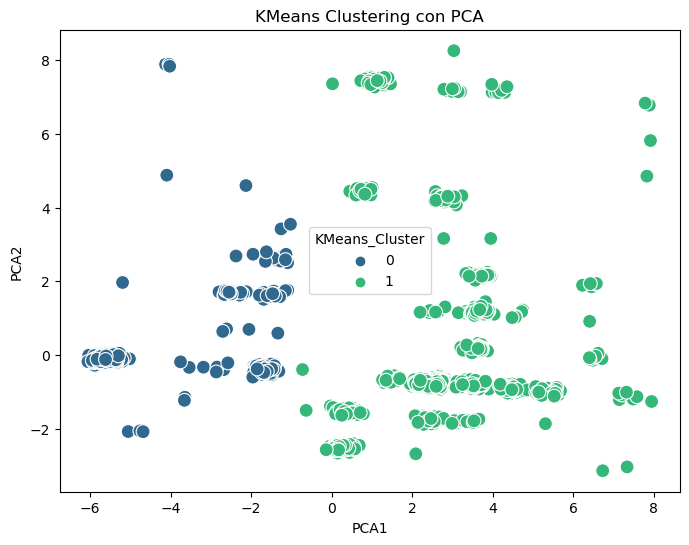

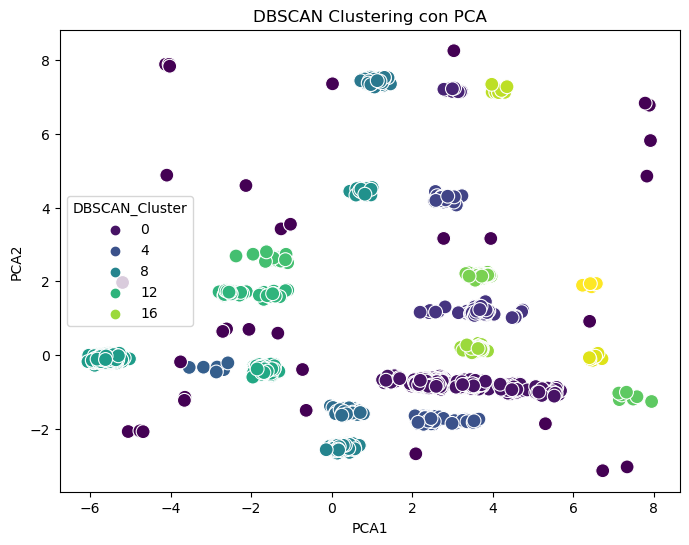

In [ ]:
# Visualización de KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df_pca, palette='viridis', s=100)
plt.title('KMeans Clustering con PCA')
plt.show()

# Visualización de DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_pca, palette='viridis', s=100)
plt.title('DBSCAN Clustering con PCA')
plt.show()


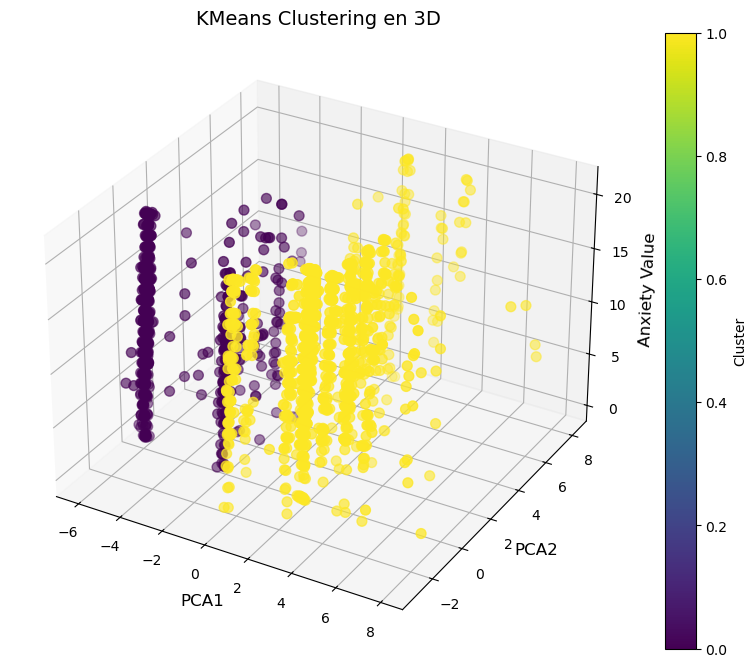

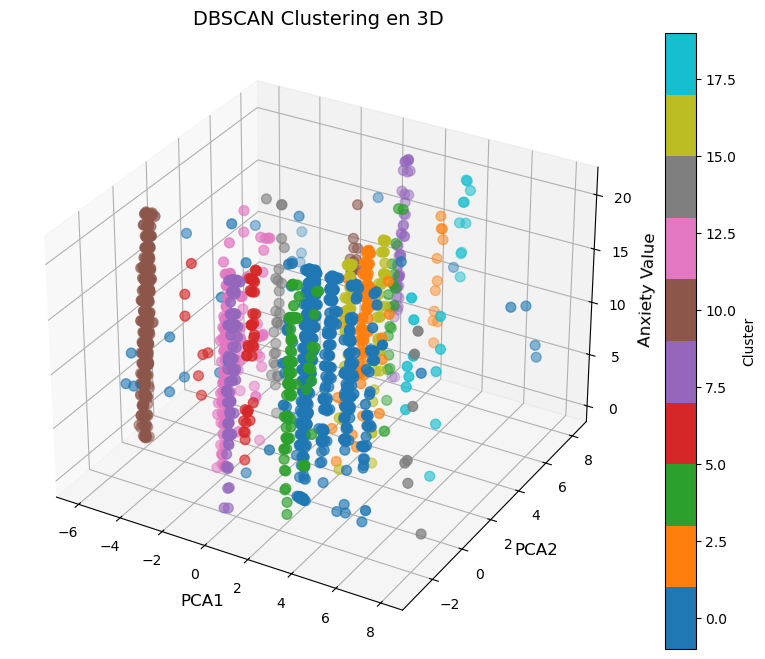

In [ ]:
# Visualización 3D: KMeans Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_pca['PCA1'], df_pca['PCA2'], dfBien['Anxiety_Value'],
    c=df_pca['KMeans_Cluster'], cmap='viridis', s=50
)
ax.set_title('KMeans Clustering en 3D', fontsize=14)
ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12)
ax.set_zlabel('Anxiety Value', fontsize=12)
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

# Visualización 3D: DBSCAN Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_pca['PCA1'], df_pca['PCA2'], dfBien['Anxiety_Value'],
    c=df_pca['DBSCAN_Cluster'], cmap='tab10', s=50
)
ax.set_title('DBSCAN Clustering en 3D', fontsize=14)
ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12)
ax.set_zlabel('Anxiety Value', fontsize=12)
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

## APRIORI Y REGLAS DE ASOCIACIÓN

In [72]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Copia del DataFrame original
df_apriori = dfBien.copy()

# 2. Discretización de las columnas

# Mapeamos las edades
age_mapping = {
    17: 'Teen',        
    20: 'Young Adult',
    24: 'Young Adult',
    28: 'Adult',       
    35: 'Mature'
}
df_apriori['Age_Category'] = df_apriori['Age'].map(age_mapping)

# Discretizamos CGPA
bins_cgpa = [0, 2.5, 3.0, 3.5, 4.0]
labels_cgpa = ['Low', 'Medium', 'High', 'Very_High']
df_apriori['CGPA_Category'] = pd.cut(df_apriori['CGPA'], bins=bins_cgpa, labels=labels_cgpa, include_lowest=True)

# Convertimos las demás columnas categóricas en texto
df_apriori['Beca'] = df_apriori['Beca'].map({0: 'No_Beca', 1: 'Beca'})
df_apriori['Gender'] = df_apriori['Gender'].map({0: 'Female', 1: 'Male', 2: 'Prefer not to say'})
df_apriori['Year'] = df_apriori['Year'].astype(str)

# 3. Creamos la columna con listas de transacciones
columns_to_encode = [
    'Age_Category', 'CGPA_Category', 'Anxiety_Label', 'Stress_Label', 
    'Depression_Label', 'Year', 'Beca', 'Gender', 'University', 'Department'
]
df_apriori['Transaction'] = df_apriori[columns_to_encode].apply(lambda row: [str(x) for x in row.tolist()], axis=1)

# 4. Codificación binaria con TransactionEncoder
te = TransactionEncoder()
df_encoded = te.fit_transform(df_apriori['Transaction'])
df_encoded = pd.DataFrame(df_encoded, columns=te.columns_)

# 5. Aplicamos Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Mostramos los conjuntos frecuentes encontrados
print("\nConjuntos frecuentes encontrados:")
print(frequent_itemsets)

# 6. Generamos reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Mostramos las reglas generadas
print("\nReglas de asociación generadas:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])




Conjuntos frecuentes encontrados:
      support                                           itemsets
0    0.345473                                                (0)
1    0.359130                                                (1)
2    0.768842                                                (2)
3    0.310572                                                (3)
4    0.293880                                                (4)
..        ...                                                ...
595  0.107233  (Young Adult, 2, No_Beca, Very_High, Moderate, 0)
596  0.130501       (Male, Young Adult, 2, No_Beca, 1, Moderate)
597  0.132524    (Male, High, Young Adult, 2, No_Beca, Moderate)
598  0.143146    (Male, Young Adult, Mild, 2, No_Beca, Moderate)
599  0.123925  (Male, Young Adult, 2, No_Beca, Very_High, Mod...

[600 rows x 2 columns]

Reglas de asociación generadas:
                               antecedents                 consequents  \
0                                      (0)            